# Lab 8: Playing with Interactivity

In this lab, we're going to play around with interactive elements, following from Monday's lecture. This lab shouldn't take you longer than class to complete, as you should be in the process of really getting into the depths of your final projects this week (and onward). 

```{note}
This lab will be a little different than previous ones. Because interactivity often requires standalone scripts, you won't be able to do everything inside a notebook. I'll be using this notebook to provide code snippets, but you'll ultimately be working in `.py` files for this assignment.
```

## Problem 1: Widgets with Matplotlib 

I mentioned in lecture that `matplotlib` has a widgets feature, that allows for sliders, text entry, and buttons. Of all options, this is one of the clunkiest, and your "GUI" (the program people use) will actually be a glorified plot. But for simple applications, this method of making guis requires the least amount of "new python/libraries" to learn. 

Below, I've shown a picture of a GUI I made in `matplotlib` for a quick D&D related program:

<img src='./monsterhp_gui.png' width='400' />

As you can see at the top, this is a `matplotlib` `Figure` object. But it *does* have the functionality of a GUI, with text entry fields and buttons. 

The downside of the above is that every element (button, field, etc) is specified in *figure coordinates*, and took a lot of fiddling to get placed properly. HTML-based templates don't have this problem. 

We won't be doing anything quite this complex in this lab, but it's useful to know what's possible. 

### Problem 1.1

In this example, we'll add sliders to a plot that set the `vmin` and `vmax` parameters of a `plt.imshow()` command. This will let us dynamically play with the scaling of a plotted image. Because the "raw" value of these parameters can vary widely from image to image, a more robust two sliders would be "mean" (the centerpoint of the range), and "scale" (the multiplier on the standard deviation of the image to apply). This should be familiar from lab 2. 

The building blocks of an interactive matplotlib plot are the following 

- an initial plot 
- a Button or Slider object, which is attached to an axis on the figure 
- an "update" function, provided to the Button/Slider. Running the `slider.on_changed(update)` executes the update function when the slider/button is interacted with. 
- the update function's interior usually has plotting commands unlike those we are used to. Instead of remaking new figures, we're going to overwrite the data being plotted in the figure (see below) 


**Start off by making a script which loads any `FITS` image (one of your own or one we've used in class), and uses your `implot` to plot it in a window when the code is run.***

If you followed along last Monday's lecture, you should be able to import your function from the example package you installed!

```{hint}
When in scripts, you need a `plt.show()` as the last line of your plotting code to get it to show up, which is not an issue in jupyter notebooks. You'll also want to set `plt.ion()` at the top of your code (under the imports).
```


### Problem 1.2 

Great, we now have code that plots an image in a pop-up window. 

We now need to add an `axes` object to the plot, which is going to contain our axis. There are about a million ways to do this. 

In this case, we are going to add two commands: 
- one tells the plot to make a little bit of extra space on the right
- the second makes the axis 

This is a little complicated, so I'm going to provide this code. Do try to figure it out though! It also makes sure that the new axes are the same height as our image.

You should get something like what I show below -- two tall skinny axes next to your image. 

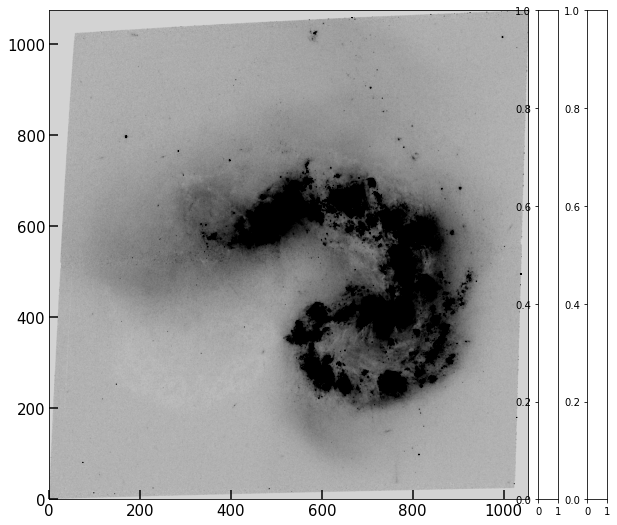

In [5]:
# You'll need this import
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

#This block assumes you have fig, ax defined, which come from setting fig, ax to your implot command.

divider = make_axes_locatable(ax)
aspect = 25 #aspect ratio of the slider (tall and skinny)
pad_fraction = 0.5 # padding
width = axes_size.AxesY(ax, aspect=1./aspect) # this will be the width of each slider
pad = axes_size.Fraction(pad_fraction, width) # this is the true padding in fig coords
mean_ax = divider.append_axes("right", size=width, pad=pad) # add axes to the right
scale_ax = divider.append_axes("right",size=width,pad=pad+width) #add axes to the right

### Problem 1.3 

We are going to need to access the `matplotlib.AxesImage` object currently sitting inside `ax` when returned by `implot`. I'm providing this line for you -- add it right below your `fig, ax` call. 

In [ ]:
image = ax.get_images()[0] #this retrieves the image objects inside ax. There's only one, so we'll grab the 0th index.

### Problem 1.4

We now can move on to making the sliders! The code for making sliders and assigning them to pre-existing axes is pretty simple. I'm providing the code to do this for the 'mean' axis below -- copy it and modify it to make it work for the scale axis as well.

```{note}
You'll need some additional imports: `from matplotlib.widgets import Slider`. 
```

In [ ]:
mean = Slider(ax=mean_ax, 
              label='mean', 
              valmin=-10*np.mean(im), 
              valmax= 10*np.mean(im), 
              valinit=np.mean(im), 
              valstep=1,
              orientation='vertical')

## Add one for scale 

In the cell above, I've had to set a max and min value for this slider. I chose one tenth the mean of the image, and 10x. You can play around with this as you wish.

```{note}
When you assign sliders to the axes, the tick labels will automatically dissapear. You should now have two movable sliders... they just don't change anything yet.
```

### Problem 1.5 

The final piece of the puzzle is writing the `update()` function. This function gets triggered when one of our sliders updates. 

The way we **modify** what's going on on our plot without **replotting** it is via `image.set_clim(vmin,vmax)`, followed by `fig.canvas.draw()`. 

When working with interactive changes and animations in matplotlib, we never want to create thousands of figures as a slider changes, we just want to re-draw the figure we have. The above lines set the min/max limits as desired, and the canvas draw command redraws the figure. 

You'll need to write an update function that carries these two commands out. But inside, it needs to determine what `vmin` and `vmax` should be. Luckily, we know this: it's whatever the mean of the image is times the "mean" slider value, plus or minus the standard deviation of the image times the "scale" slider value. We can access the value of each slider via `mean.val` and `scale.val`. Thus, our update function doesn't need any inputs, it will just read the slider values from the global namespace (marginally bad practice but it's fine...) 

Implement your `update()` function. 

Then, add the following lines:

In [ ]:
# Add update function 


mean.on_changed(update)
scale.on_changed(update)

(Assuming you named your second slider `scale`.) 

That's it! Once you run this, you should be able to change both the mean and scale sliders and see how this dynamically changes the details you see in the images!


Below is an image of what my final "plot/app" looks like:

<img src="final_look.png" width="400"/>


### Bonus Problem

You may know that tools like `DS9` allow you to click buttons that change the scaling from linear to log or zscale. You can also choose from several colormaps. 

These features are *very easy* to add to your code above! You will import `Button` from matplotlibs widgets (where `Slider` came from), and add buttons for some of these changes. Then just add functions for the `on_clicked` method of each button, which use matplotlib commands like `image.set_cmap()` to set the relevant parameter and then redraw the canvas. 

Choose from the following (or add up to 2 of your own) features to add to your code. For each one you implement, we'll give 0.5 bonus points on the lab. 

- reverse cmap button (changes the colormap to the `_r` version or vice versa) 
- set cmap buttons (add some buttons for several well known cmaps, like gray, plasma, viridis, etc) 
- set scaling (little harder, but use something like `LogNorm()` to allow a button press to set the actual mapping of counts to something not linear. We suggest log as the easiest, but plenty more exist to play with. `astropy` has some (even zscale!) implemented ([see here](https://docs.astropy.org/en/stable/api/astropy.visualization.ZScaleInterval.html)).



### Bonus Problem 2 (+3) 

If you make a snazzy version of this, package it up! Someone should be able to, e.g., 

```
from ds9LikePlotting import ds9plot 

ds9plot(some_image) 
```

after which a snazzy plot comes up, with sliders and buttons that give (some) ds9-like functionality, with an initial view that's already good (thanks to our awesome `implot` function). 

This question is great practice for your final projects.... 